In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [ ]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :2] # Get first two columns from all the input data
    y = data[:, 2]
    return X, y

In [2]:
X_train, y_train = load_data("data/ex2data1.txt")

In [3]:
print("First five elements of input data: \n", X_train[:5])
print("Type of input data: ", type(X_train))

First five elements of input data: 
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of input data:  <class 'numpy.ndarray'>


In [9]:
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of y_train is: {y_train.shape}")
# print(f"Number of training examples: {len(y_train)}")
print(f"Number of training example is: {X_train.shape[0]}")

The shape of X_train: (100, 2)
The shape of y_train is: (100,)
Number of training example is: 100


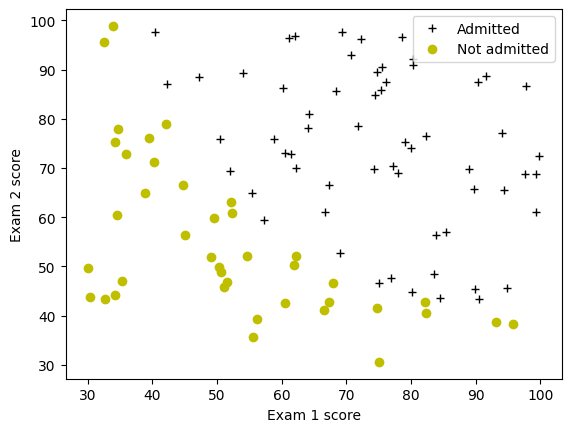

In [10]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.legend(loc="upper right")
plt.show()

In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Args:
        z (ndarray): A scalar or numpy array of any size.
    
    returns:
        g (ndarray): sigmoid(z), same sahpe as z
    """

    return 1 / (1 + np.exp(-z))

In [16]:
print(sigmoid(0))
print(sigmoid(np.array([1, 0, 2, -1, -10])))

0.5
[7.31058579e-01 5.00000000e-01 8.80797078e-01 2.68941421e-01
 4.53978687e-05]


In [20]:
def compute_cost(X, y, w, b, lambda_ = 1):
    """
    Returns the total loss for the input data

    Args:
        X (ndarray): A numpy array for the input of shape(m, n)
        y (ndarray): A numpy array for output label of shape (m,)
        w (ndarray): Weight array of shape (n,)
        b (scalar): bias 

    Returns:
        total loss (scalar)
    """
    m = X.shape[0]

    total_loss = 0
    for i in range(m):
        f_w_b = sigmoid(np.dot(X[i], w) + b)
        loss = -y[i] * np.log(f_w_b) - (1 - y[i]) * np.log(1 - f_w_b)
        total_loss += loss

    return total_loss / m
        
    

In [21]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [34]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [35]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}')

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [54]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {J_history[-1]}")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [55]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost [0.96379018]
Iteration 1000: Cost [0.30509033]
Iteration 2000: Cost [0.30472281]
Iteration 3000: Cost [0.30435771]
Iteration 4000: Cost [0.303995]
Iteration 5000: Cost [0.30363467]
Iteration 6000: Cost [0.30327668]
Iteration 7000: Cost [0.30292101]
Iteration 8000: Cost [0.30256764]
Iteration 9000: Cost [0.30221655]
Iteration 9999: Cost [0.30186807]


In [56]:
J_history

[array([0.96379018]),
 array([0.41987274]),
 array([0.30676098]),
 array([0.30637613]),
 array([0.30625023]),
 array([0.30614755]),
 array([0.30605834]),
 array([0.3059806]),
 array([0.30591285]),
 array([0.30585379]),
 array([0.3058023]),
 array([0.3057574]),
 array([0.30571824]),
 array([0.30568408]),
 array([0.30565428]),
 array([0.30562827]),
 array([0.30560556]),
 array([0.30558573]),
 array([0.30556841]),
 array([0.30555327]),
 array([0.30554003]),
 array([0.30552845]),
 array([0.30551831]),
 array([0.30550942]),
 array([0.30550164]),
 array([0.3054948]),
 array([0.3054888]),
 array([0.30548352]),
 array([0.30547888]),
 array([0.30547478]),
 array([0.30547116]),
 array([0.30546796]),
 array([0.30546513]),
 array([0.30546261]),
 array([0.30546037]),
 array([0.30545836]),
 array([0.30545657]),
 array([0.30545496]),
 array([0.30545351]),
 array([0.3054522]),
 array([0.30545101]),
 array([0.30544992]),
 array([0.30544893]),
 array([0.30544801]),
 array([0.30544717]),
 array([0.305446

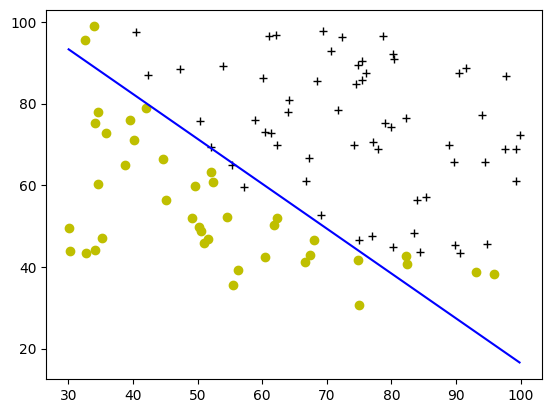

In [57]:
plot_decision_boundary(w, b, X_train, y_train)

In [46]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [48]:
def predict_test(target):
    np.random.seed(5)
    b = 0.5    
    w = np.random.randn(3)
    X = np.random.randn(8, 3)
    
    result = target(X, w, b)
    wrong_1 = [1., 1., 0., 0., 1., 0., 0., 1.]
    expected_1 = [1., 1., 1., 0., 1., 0., 0., 1.]
    if np.allclose(result, wrong_1):
        raise ValueError("Did you apply the sigmoid before applying the threshold?")
    assert result.shape == (len(X),), f"Wrong length. Expected : {(len(X),)} got: {result.shape}"
    assert np.allclose(result, expected_1), f"Wrong output: Expected : {expected_1} got: {result}"
    
    b = -1.7    
    w = np.random.randn(4) + 0.6
    X = np.random.randn(6, 4)
    
    result = target(X, w, b)
    expected_2 = [0., 0., 0., 1., 1., 0.]
    assert result.shape == (len(X),), f"Wrong length. Expected : {(len(X),)} got: {result.shape}"
    assert np.allclose(result,expected_2), f"Wrong output: Expected : {expected_2} got: {result}"

    print('\033[92mAll tests passed!')

In [49]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


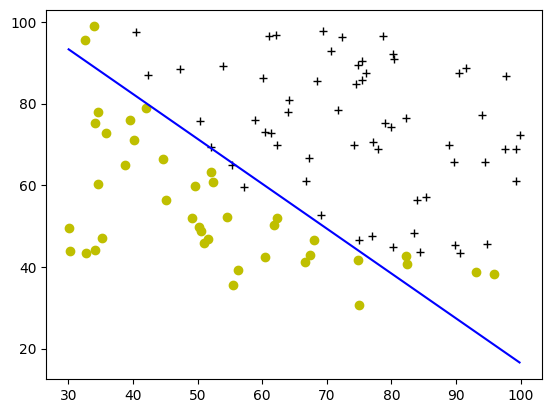

In [50]:
plot_decision_boundary(w, b, X_train, y_train)

In [51]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
